<center><h1><b>ASSIGNMENT</b></h1></center>
Consider a solid with heat capacity C and an initial temperature T0. The solid is placed in an environment with temperature T_e, and heat is transferred from the environment to the solid over time. The rate of heat transfer, dQ/dt, can be described by the equation:

$$\frac{dQ}{dt} = -kA \frac{(T - T_{e})}{d}$$

***where k is the thermal conductivity of the solid, A is the surface area, d is the thickness of the solid, and T is the temperature of the solid.***

Use a for loop in Python to solve this equation numerically and determine the temperature T of the solid as a function of time ($t$). The simulation should run from $t=0$ to $t=t_{final}$ with a time step dt, and the initial temperature should be $T_0$.

Calculate the specific heat capacity $C_p$ of the solid by running the simulation for a range of heat inputs and plotting the temperature ($T$) versus the heat input ($Q$). Extract the slope of this plot, which will give you $\frac{C_p}{V}$, where $V$ is the volume of the solid.

***Given the parameters $k=0.1$, $A=1$, $d=0.1$, $T_{e}=300$, $T_0=500$, $dt=0.01$, and $t_{final}=100$.***

In [1]:
import numpy as np
import matplotlib.pyplot as plt


thermal_conductivity = 0.1
surface_area = 1
thickness = 0.1
final_temperature = 300
initial_temperature = 500
initial_time = 0
time_increment = 0.01
final_time = 100


def calculate_heat_transfer_rate(temperature):
    rate = -thermal_conductivity * surface_area * (temperature - final_temperature) / thickness
    return rate


def solve_differential_equation():
    temperature = initial_temperature
    time_points = np.arange(initial_time, final_time, time_increment)
    temperature_values = []
    for t in time_points:
        heat_rate = calculate_heat_transfer_rate(temperature)
        temperature_change = heat_rate * time_increment
        temperature += temperature_change
        temperature_values.append(temperature)
    return time_points, temperature_values


time_points, temperature_values = solve_differential_equation() # Calculating temperature as a function of time


heat_input = np.cumsum(-np.array(temperature_values[1:]) * time_increment * thermal_conductivity * surface_area / thickness) # Calculating heat input as a function of time

# Calculating for specific heat capacity Cp/V
slope, _ = np.polyfit(heat_input, temperature_values[1:], 1)
specific_heat_capacity = slope
print("Specific heat capacity Cp/V:", specific_heat_capacity)

Specific heat capacity Cp/V: 0.0003865181544293308


<center><h2> Graphical Representation of Results</h2></center>

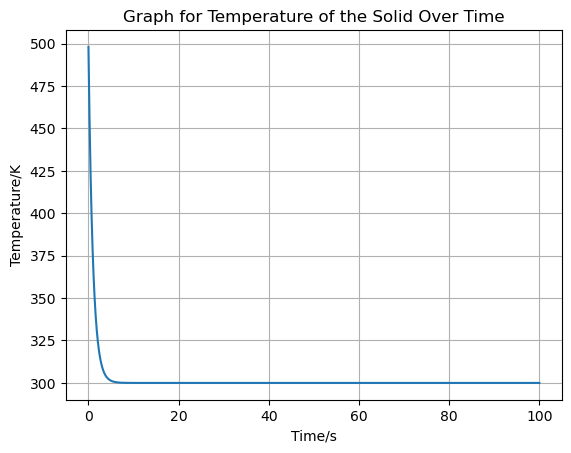

In [2]:
# Plot for temperature versus time
plt.plot(time_points, temperature_values)
plt.xlabel('Time/s')
plt.ylabel('Temperature/K')
plt.title('Graph for Temperature of the Solid Over Time')
plt.grid(True)
plt.show()

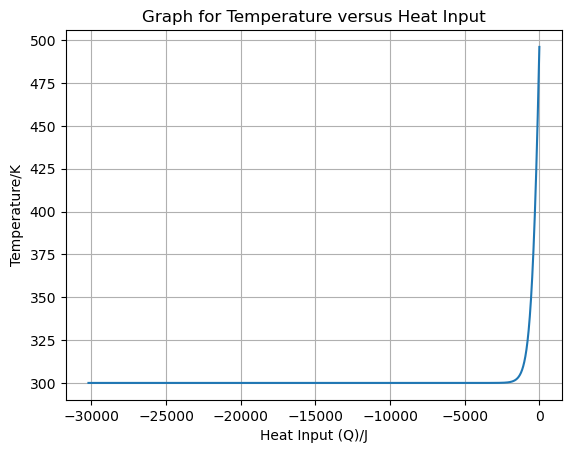

In [3]:
# Plot temperature versus heat input
plt.plot(heat_input, temperature_values[1:])
plt.xlabel('Heat Input (Q)/J')
plt.ylabel('Temperature/K')
plt.title('Graph for Temperature versus Heat Input')
plt.grid(True)
plt.show()